<a href="https://colab.research.google.com/github/killianb22/Forecasting-Project-Non-Seasonal-Data/blob/main/NonSeasonal_BirthsIreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Live Births in Ireland 1980-2019

# Reading the Data

In [ ]:
install.packages("forecast")
install.packages("stringr")
install.packages("tseries")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse) #for data manipulation and visualization
library(tseries) 
library(stringr) #for string data
library(forecast) #provides methods and tools for displaying and analysing time series forecasting

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
url = "https://raw.githubusercontent.com/killianb22/Forecasting-Project-Non-Seasonal-Data/main/BirthsNumber.csv"
data <- read_csv(url)

Rows: 40 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Statistic, County of Residence of Mother, UNIT
dbl (2): Year, VALUE(Thousands)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(data) #check starting year

Statistic,Year,County of Residence of Mother,UNIT,VALUE(Thousands)
<chr>,<dbl>,<chr>,<chr>,<dbl>
Live Births,1980,All counties and regions,Number,74064
Live Births,1981,All counties and regions,Number,72158
Live Births,1982,All counties and regions,Number,70843
Live Births,1983,All counties and regions,Number,67117
Live Births,1984,All counties and regions,Number,64062
Live Births,1985,All counties and regions,Number,62388


In [ ]:
summary(data)

  Statistic              Year      County of Residence of Mother
 Length:40          Min.   :1980   Length:40                    
 Class :character   1st Qu.:1990   Class :character             
 Mode  :character   Median :2000   Mode  :character             
                    Mean   :2000                                
                    3rd Qu.:2009                                
                    Max.   :2019                                
     UNIT           VALUE(Thousands)
 Length:40          Min.   :48255   
 Class :character   1st Qu.:53958   
 Mode  :character   Median :61574   
                    Mean   :61649   
                    3rd Qu.:67704   
                    Max.   :75554   



# Plotting The Time Series

In [ ]:
# Remove first, second, third and fourth columns and then transpose the data set and then converted to a vector 
temp = as.vector(t(data[,-c(1,2,3,4)]))

In [ ]:
head(temp) #show first 6 birth numbers

A Time Series:
[1] 74064 72158 70843 67117 64062 62388

In [ ]:
#convert it to time series ts object with starting year 1980 and frequency 1 year
temp = ts(temp,start=1980,frequency=1)

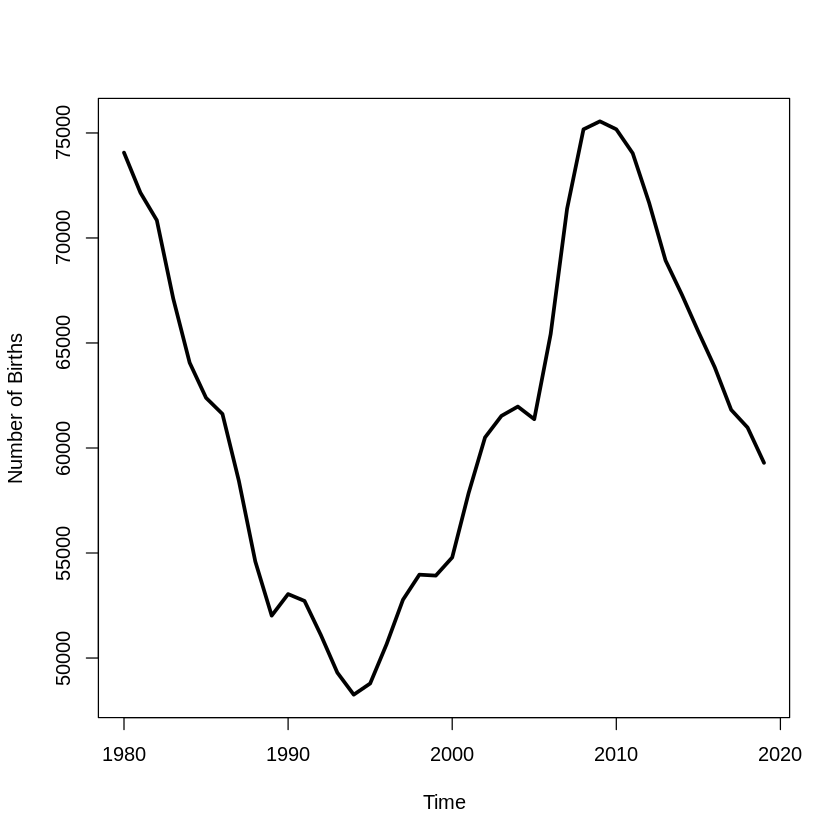

In [ ]:
#plot the data vs time
ts.plot(temp,ylab="Number of Births",lwd=3)


Check for missing values

In [ ]:
complete <- TRUE
for(c in complete.cases(temp)) {
if(!c){
complete == FALSE
}
}
if(complete){
print("No missing values")
} else {
print ("There are missing values")
}

[1] "No missing values"


#Checking Stationarity

Stationary data refers to the time series data that mean and variance do not vary across time. The data is considered non-stationary if there is a strong trend or seasonality observed from the dat

At first glance the data doesn't seem to be stationary as the average and mean definetly changes over time so we will need to transform the data later to be stationary

We can more accurately check if the time series is stationary by using the Augmented Dickey-Fuller Test (adf
test). A p-Value of less than 0.05 in adf.test() indicates that it is stationary.

In [ ]:
adf.test(temp) #If p value is < 0.05 the time series may be stationary


	Augmented Dickey-Fuller Test

data:  temp
Dickey-Fuller = -1.7963, Lag order = 3, p-value = 0.6534
alternative hypothesis: stationary


In [ ]:
pp.test(temp, lshort = FALSE)


	Phillips-Perron Unit Root Test

data:  temp
Dickey-Fuller Z(alpha) = -6.5526, Truncation lag parameter = 9, p-value
= 0.7179
alternative hypothesis: stationary


ADF - The test suggests that the data is not stationary due to the p value being > .05.
KPPS "LEVEL" - The p-value is below 0.01, so we reject that this series is
stationary

#Smoothing the Time Series


## Kernel Smoothing

In [ ]:
#Create equally spaced time points for fitting trends
time.pts = c(1:length(temp))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

In [ ]:
ma.fit = ma(temp, order=2, centre=TRUE)
temp.fit.ma = ts(ma.fit, start=c(1980, 1), frequency=1)

ksmooth.fit = ksmooth(time.pts, temp, kernel = "box", bandwidth = 0.2)
temp.fit.ksmooth = ts(ksmooth.fit$y,start=c(1980, 1),frequency=1)

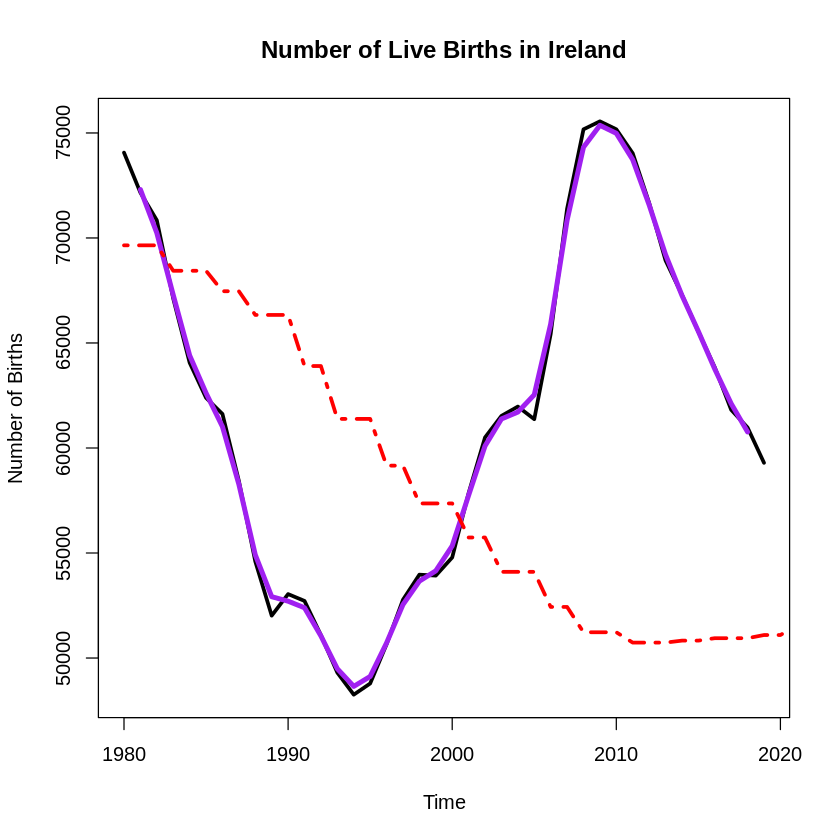

In [ ]:
ts.plot(temp,ylab="Number of Births", main="Number of Live Births in Ireland",lwd=3)
lines(temp.fit.ma, col="purple", lwd=4)
lines(temp.fit.ksmooth,lwd=3, lty=4 ,col="red")

## Loess Smoothing


LOESS (locally weighted smoothing), is a popular tool used in regression analysis that creates a smooth line through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

In [ ]:
#LOESS SMOOTHING
loess.fit = loess(as.matrix(temp)~time.pts, data=temp, span=0.2)
temp.fit.loess = ts(predict(loess.fit), start=c(1980, 1), frequency=1)

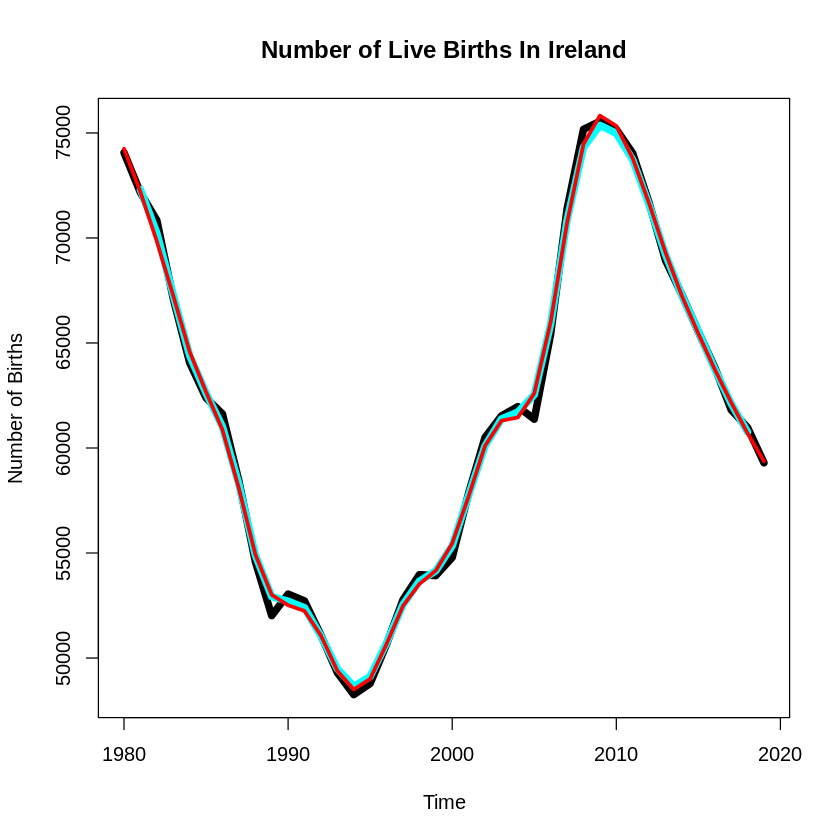

In [ ]:
ts.plot(temp,ylab="Number of Births", main="Number of Live Births In Ireland",lwd = 6)
lines(ma.fit,lwd=6,col="cyan")
lines(temp.fit.loess, col="red", lwd=3)

**SPAN** controls the degree of smoothing (greater values, smoother fit) I will use just the years for the observations

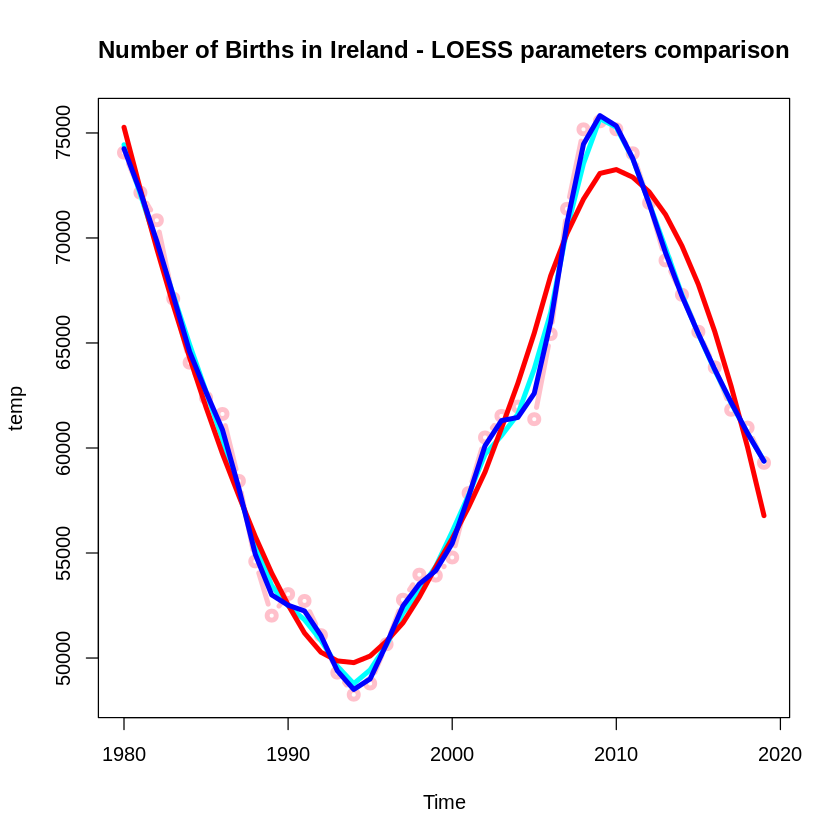

In [ ]:
loess_fit25 <- loess(as.matrix(temp)~time.pts, data=temp, span=0.25) #25%smoothing span
loess_fit50 <- loess(as.matrix(temp)~time.pts, data=temp, span=0.5) #50%smoothing span

smoothed.temp.loess25 <- ts(fitted(loess_fit25), start=1980)
smoothed.temp.loess50 <- ts(predict(loess_fit50), start=1980)

plot(temp, type="b", lwd=4, col="pink", main="Number of Births in Ireland - LOESS parameters comparison")
lines(smoothed.temp.loess25, col="cyan", lwd=4)
lines(smoothed.temp.loess50, col="red", lwd=4)
lines(temp.fit.loess, col="blue", lwd=4)

In [ ]:
res.loess.75 <- sum(loess.fit$residuals^2)
res.loess.50 <- sum(loess_fit25$residuals^2)  #Find span that minimizes sum of squared errors - residuals
res.loess.25 <- sum(loess_fit50$residuals^2)

In [ ]:
sprintf("Residuals (SSE) at span 0.75: %f", res.loess.75)

[1] "Residuals (SSE) at span 0.75: 8389360.444512"

In [ ]:
sprintf("Residuals (SSE) at span 0.50: %f", res.loess.50)

[1] "Residuals (SSE) at span 0.50: 24205487.848155"

In [ ]:
sprintf("Residuals (SSE) at span 0.25: %f", res.loess.25)

[1] "Residuals (SSE) at span 0.25: 103837093.604719"

Loess Span at .75 returns the lowest SSE so it fits best in this case

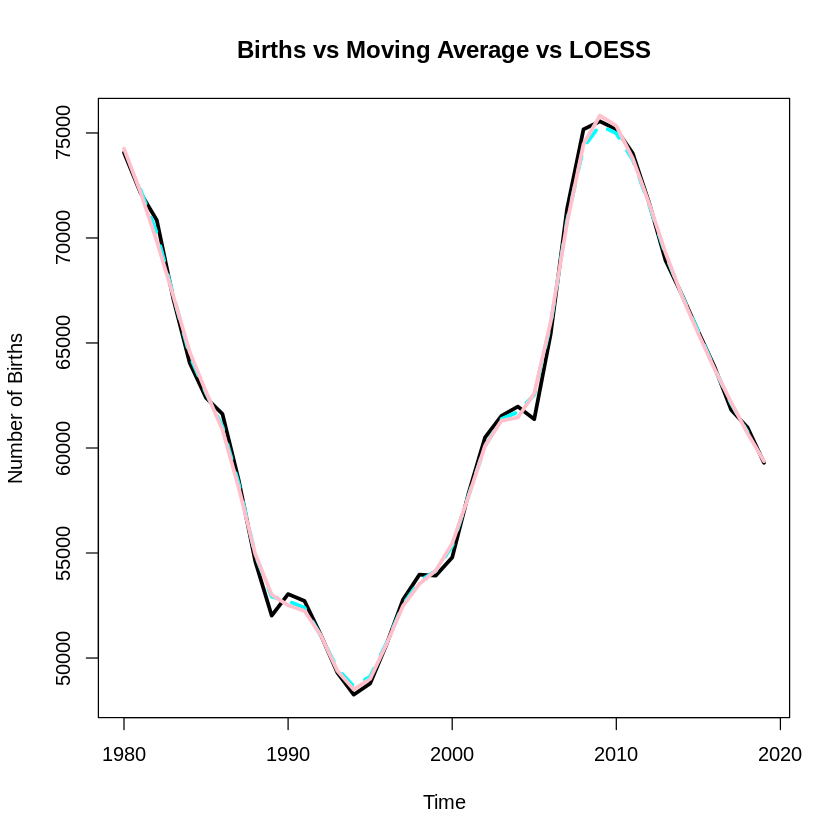

In [ ]:
ts.plot(temp,ylab="Number of Births", lwd=3, main="Births vs Moving Average vs LOESS") #Detrending the data using Loess span value at .75
lines(ma.fit, lwd=3, lty=2, col="cyan")
lines(temp.fit.loess, lwd=3 ,col="pink")

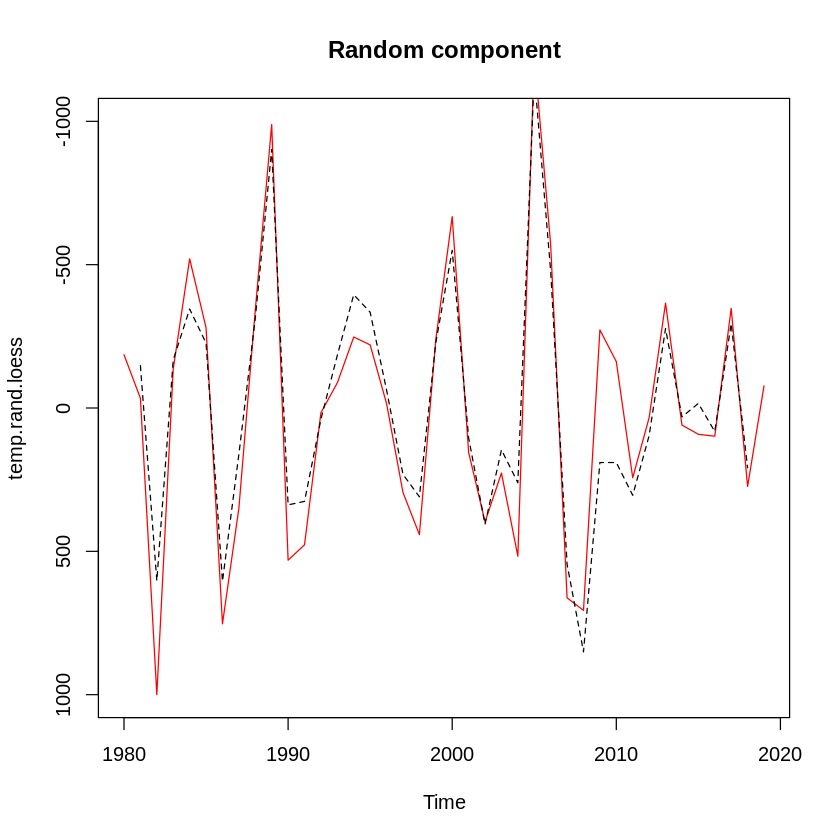

In [ ]:
temp.rand.ma <- temp-ma.fit
temp.rand.loess <- ts(loess.fit$residuals, start = 1980)
plot(temp.rand.loess, col="red", pty="1", main="Random component", ylim=c(1000, -1000))
lines(temp.rand.ma, lty=2)

#Model Selection (ETS)

Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with constant levels and no seasonality

## DIFFERENCING

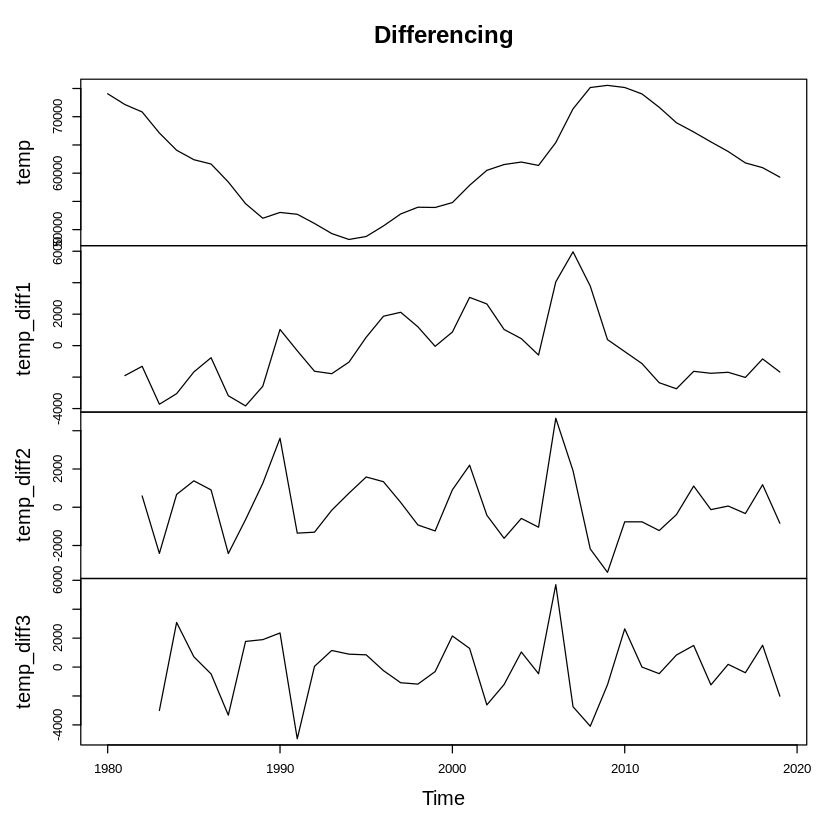

In [ ]:
#Differencing
temp_diff1 = diff(temp, lag = 1)
temp_diff2 = diff(temp_diff1)
temp_diff3 = diff(temp_diff2)
tempdiff <- cbind(temp, temp_diff1, temp_diff2, temp_diff3)
plot(tempdiff,main="Differencing")


	Augmented Dickey-Fuller Test

data:  temp_diff1
Dickey-Fuller = -1.0854, Lag order = 3, p-value = 0.9122
alternative hypothesis: stationary


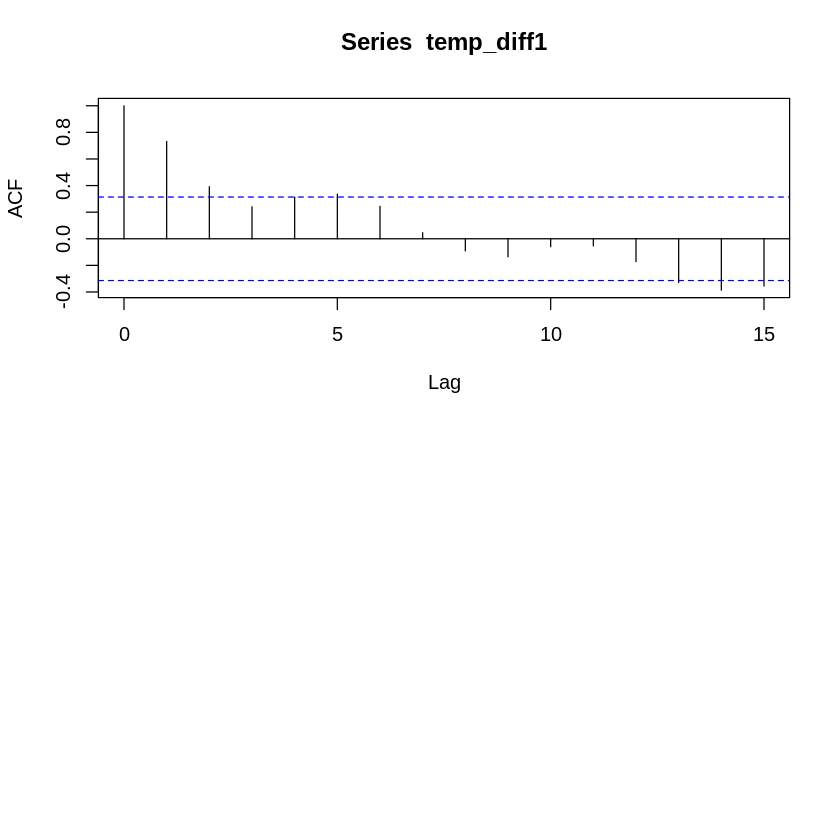

In [ ]:
par(mfrow=c(2,1))
acf(temp_diff1)
adf.test(temp_diff1)

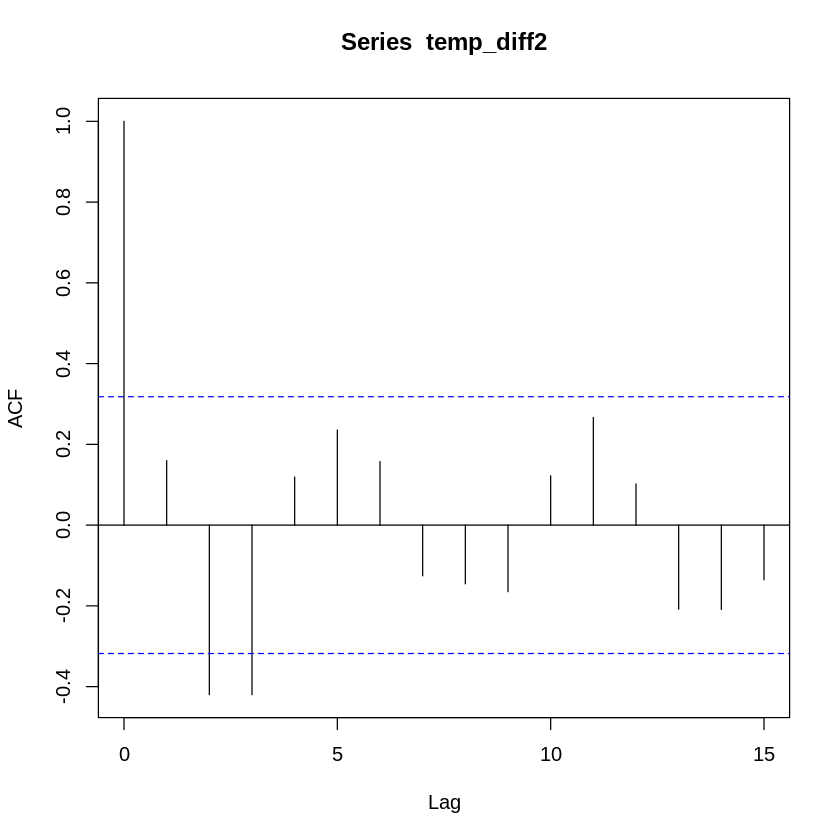

In [ ]:
acf(temp_diff2)

In [ ]:
adf.test(temp_diff2)


	Augmented Dickey-Fuller Test

data:  temp_diff2
Dickey-Fuller = -3.6449, Lag order = 3, p-value = 0.04288
alternative hypothesis: stationary


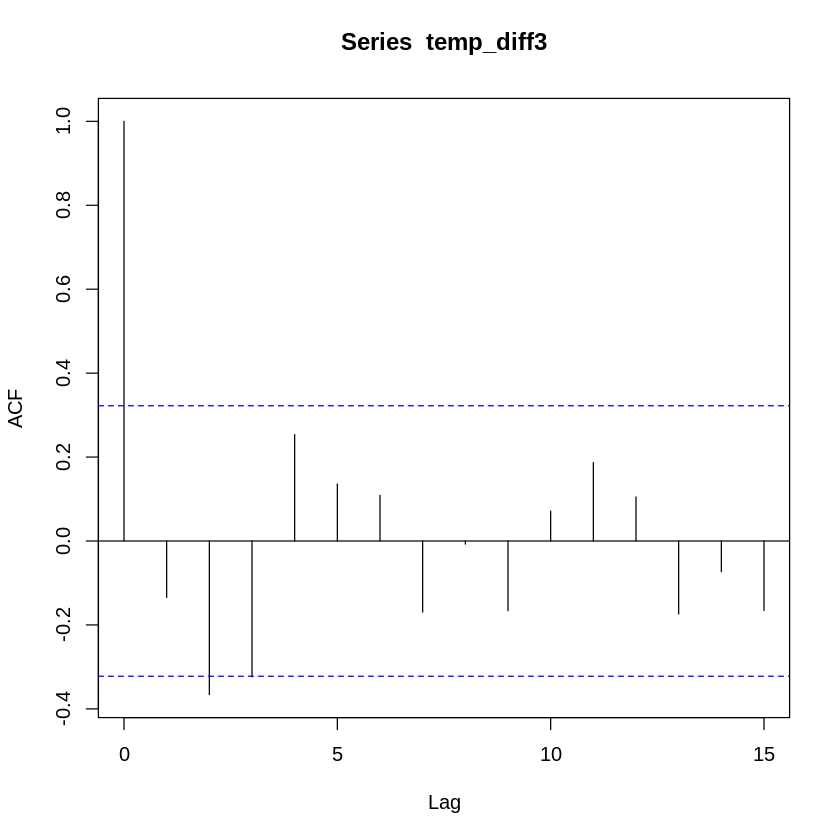

In [ ]:
acf(temp_diff3)

In [ ]:
adf.test(temp_diff3)

Warning message in adf.test(temp_diff3):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  temp_diff3
Dickey-Fuller = -5.1564, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


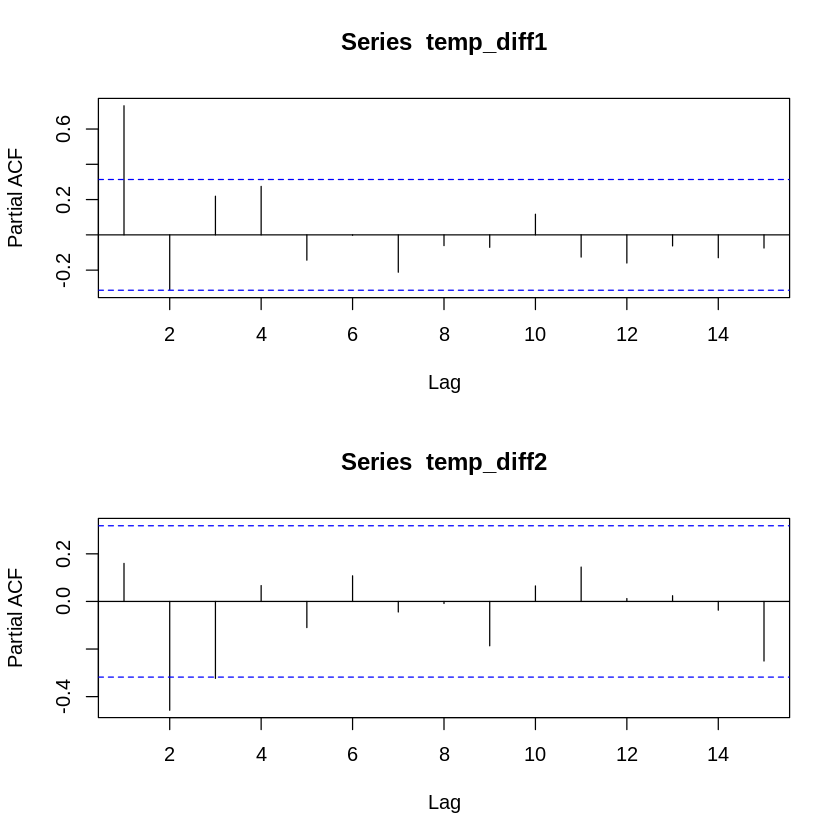

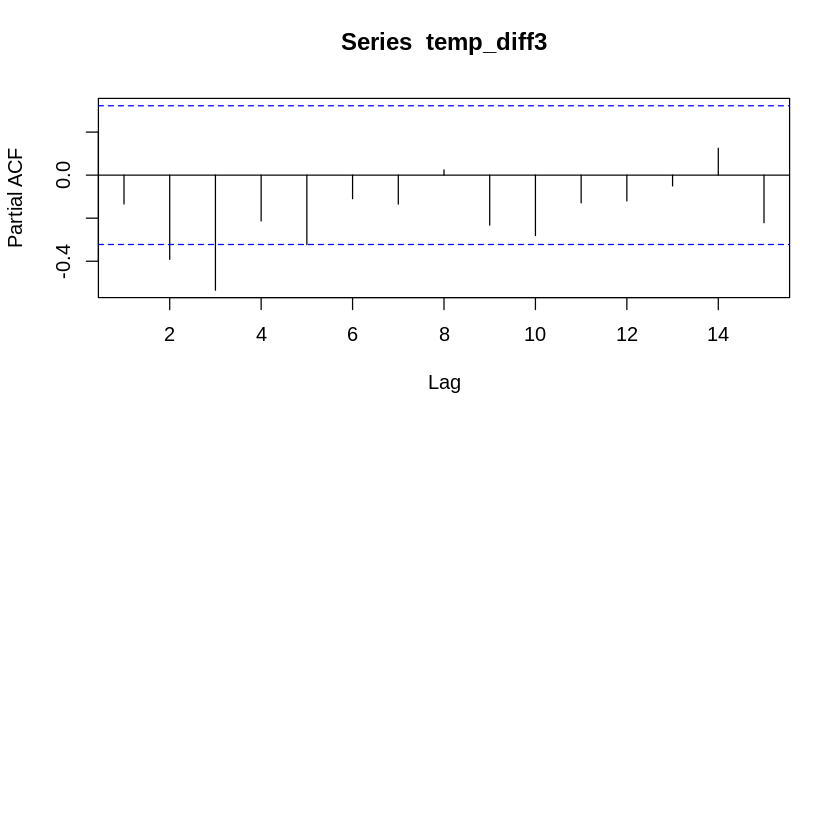

In [ ]:
par(mfrow=c(2,1))
pacf(temp_diff1)
pacf(temp_diff2)
pacf(temp_diff3)

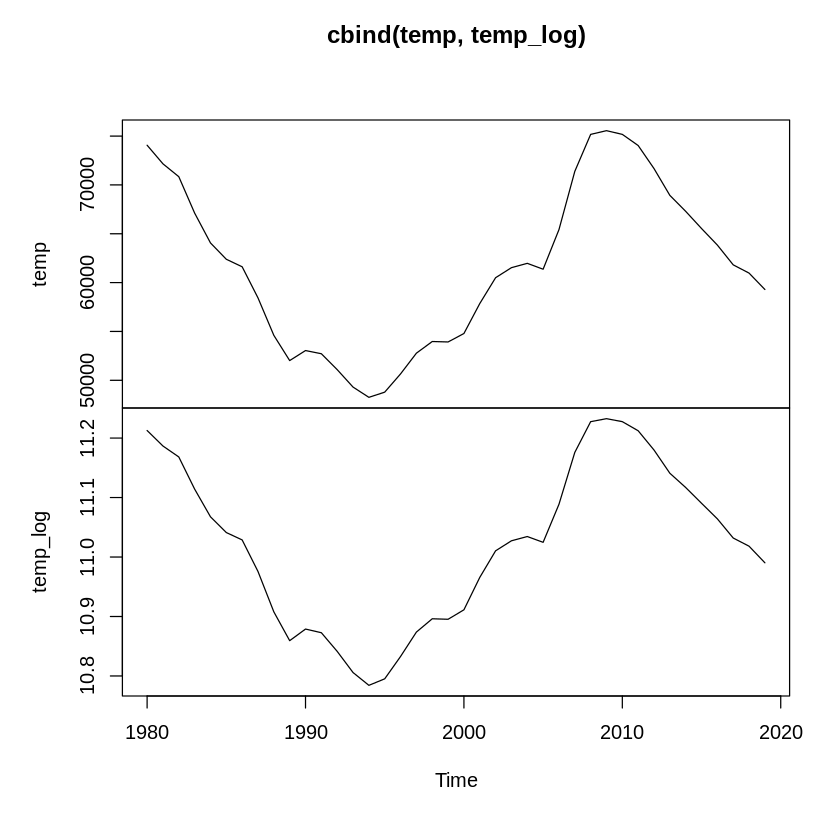

In [ ]:
temp_log = log(temp)
plot(cbind(temp, temp_log))

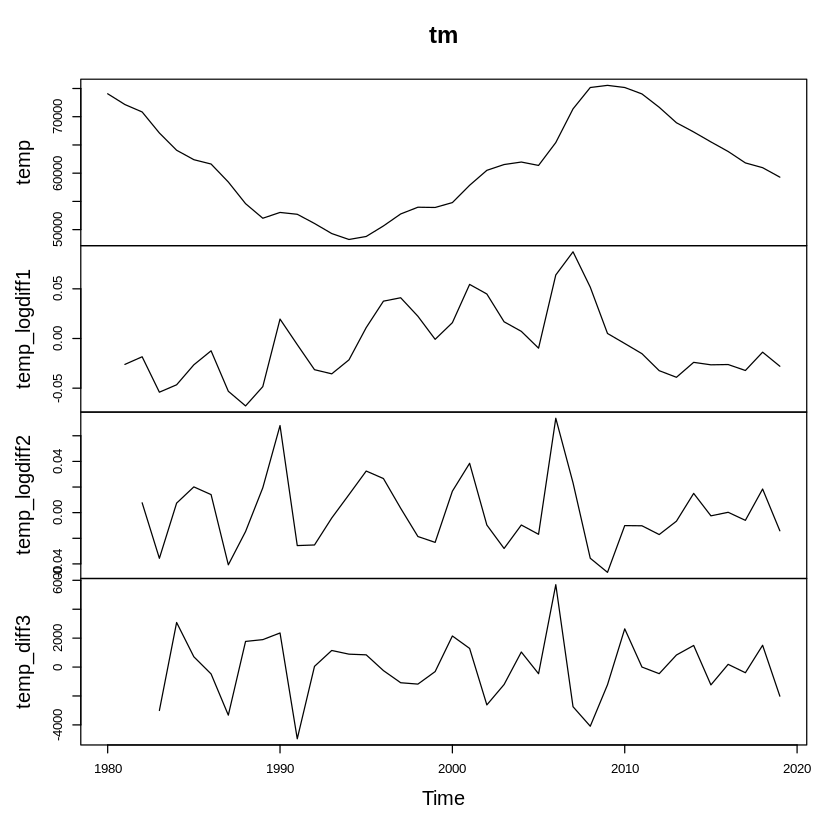

In [ ]:
temp_logdiff1 = diff(log(temp), lag = 1)
temp_logdiff2 = diff(temp_logdiff1, lag = 1)
temp_logdiff3 = diff(temp_logdiff2, lag = 1)
tm <- cbind(temp, temp_logdiff1, temp_logdiff2, temp_diff3)
plot(tm)

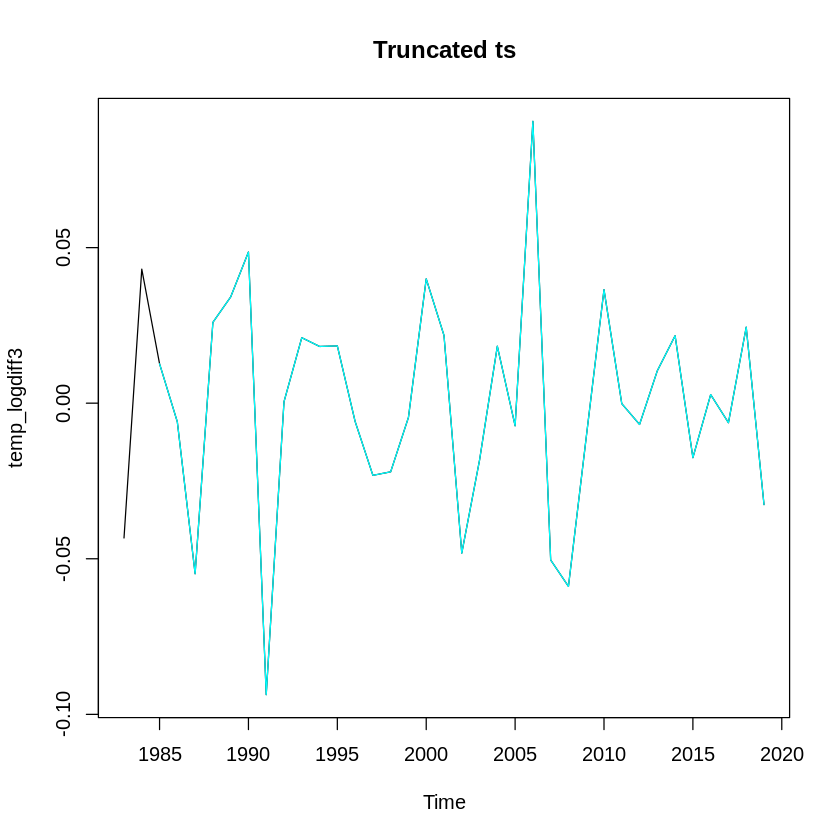

In [ ]:
plot(temp_logdiff3, main="Truncated ts")
temp.logdiff.trunc <- window(temp_logdiff3, start=1985, end=2019)
lines(temp.logdiff.trunc, col="cyan")

## HOLT WINTERS SMOOTHING

Holt’s exponenetial smoothing is a better fit for this series than other methods, as it has non seasonality

In [ ]:
temp.hw <- HoltWinters(temp_diff2, beta=FALSE, gamma=FALSE)
temp.hw

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = temp_diff2, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.04145965
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 72.05051

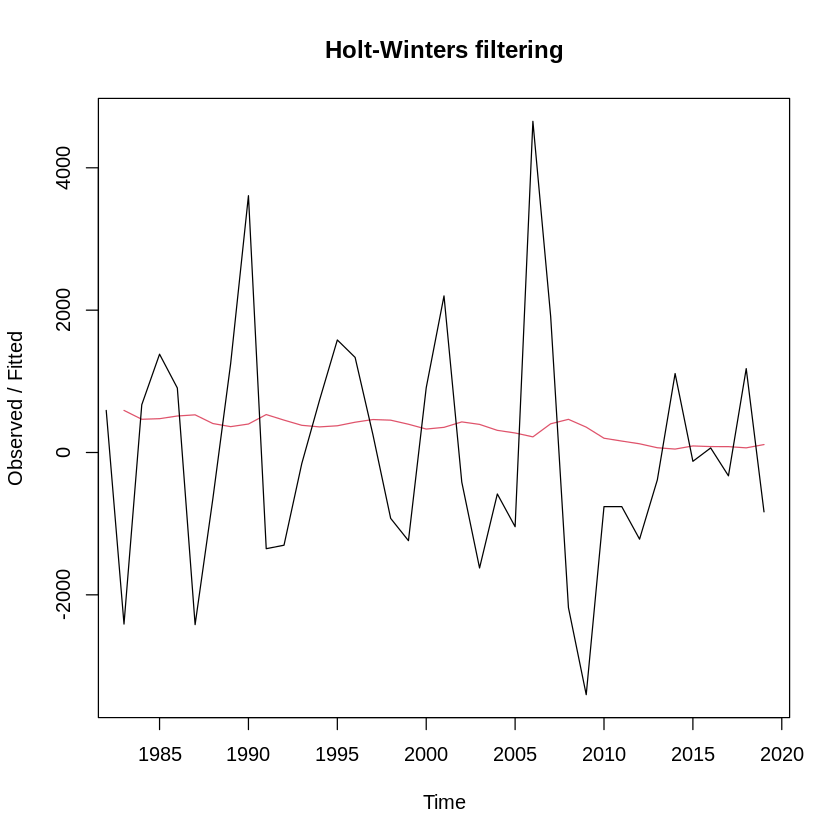

In [ ]:
plot(temp.hw)

In [ ]:
temp.hw$SSE

[1] 106265334

In [ ]:
temp.hsmooth <- HoltWinters(temp, gamma=FALSE)
temp.hsmooth

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = temp, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 1
 gamma: FALSE

Coefficients:
   [,1]
a 59294
b -1679

Alpha and beta both return a value of 1 which means that the latest value in the data holds the most weight. This means that the slope and other variables are influenced heavily by recent observations.

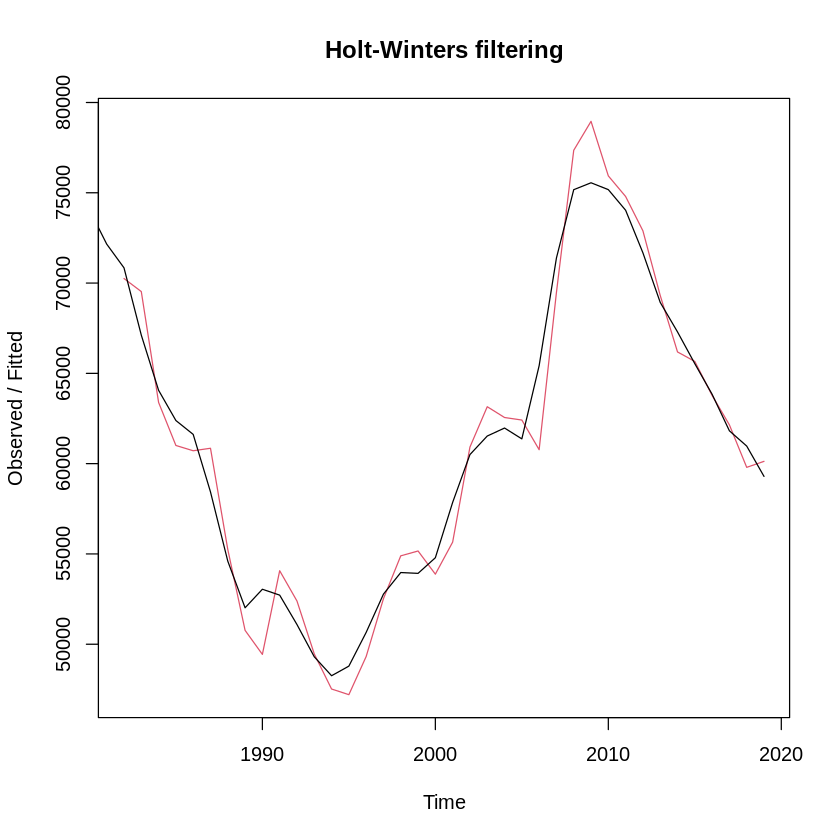

In [ ]:
plot(temp.hsmooth)

In [ ]:
temp.hsmooth$SSE

[1] 98792615

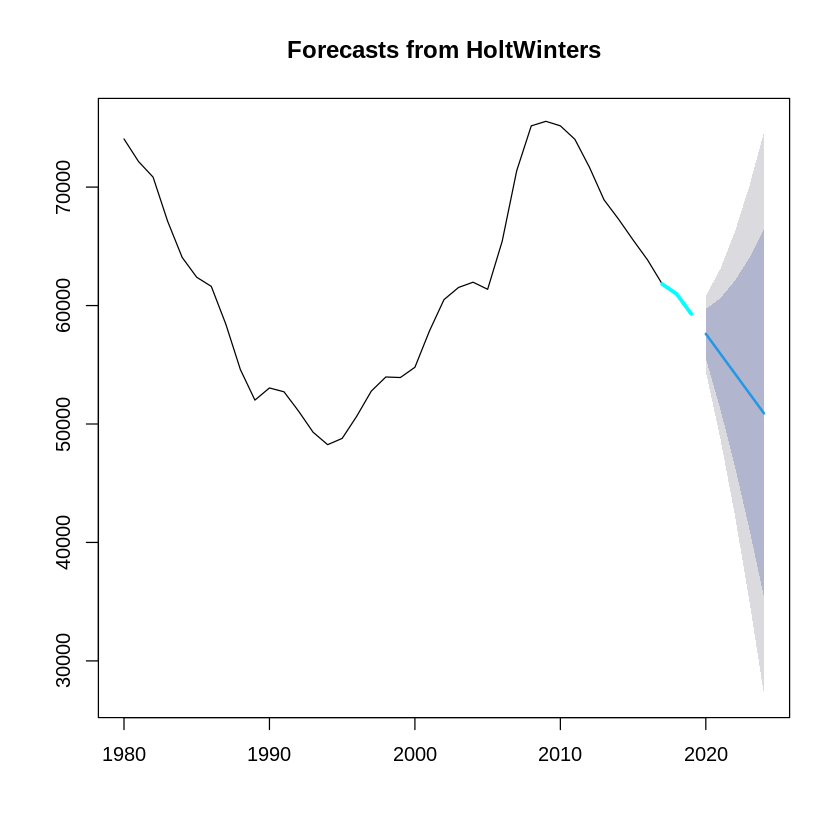

In [ ]:
temp.holdout <- window(temp, start=2017, end=2019)
forecast.temp.hwsmooth <- forecast(temp.hsmooth, h=5) #forecast next 5 years
plot(forecast.temp.hwsmooth)
lines(temp.holdout, lwd=3 ,col="cyan")

In [ ]:
temp.fit.AANets <- ets(temp, model="AAN")
coef(temp.fit.AANets)

alpha          beta           phi             l             b 
    0.9998998     0.9998989     0.8000001 77114.3539979 -1775.1750374

In [ ]:
summary(temp.fit.AANets)

ETS(A,Ad,N) 

Call:
 ets(y = temp, model = "AAN") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.9999 
    phi   = 0.8 

  Initial states:
    l = 77114.354 
    b = -1775.175 

  sigma:  1600.051

     AIC     AICc      BIC 
744.4372 746.9827 754.5705 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -87.18295 1496.711 1164.218 -0.07847664 1.903635 0.6244603
                  ACF1
Training set 0.1939213

In [ ]:
temp.fit.MANets <- ets(temp, model="MAN")
coef(temp.fit.MANets)

alpha          beta           phi             l             b 
    0.9998999     0.9998997     0.8000002 77114.6916767 -1561.1570179

In [ ]:
summary(temp.fit.MANets)

ETS(M,Ad,N) 

Call:
 ets(y = temp, model = "MAN") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.9999 
    phi   = 0.8 

  Initial states:
    l = 77114.6917 
    b = -1561.157 

  sigma:  0.0266

     AIC     AICc      BIC 
745.5872 748.1326 755.7204 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -91.46534 1501.622 1168.513 -0.0842584 1.909434 0.6267639
                  ACF1
Training set 0.1916428

In [ ]:
temp.fit.autoets <- ets(temp, model="ZZZ") #Selection of ETS model
coef(temp.fit.autoets)

alpha          beta           phi             l             b 
    0.9998998     0.9998989     0.8000001 77114.3539979 -1775.1750374

In [ ]:
summary(temp.fit.autoets)

ETS(A,Ad,N) 

Call:
 ets(y = temp, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.9999 
    phi   = 0.8 

  Initial states:
    l = 77114.354 
    b = -1775.175 

  sigma:  1600.051

     AIC     AICc      BIC 
744.4372 746.9827 754.5705 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -87.18295 1496.711 1164.218 -0.07847664 1.903635 0.6244603
                  ACF1
Training set 0.1939213

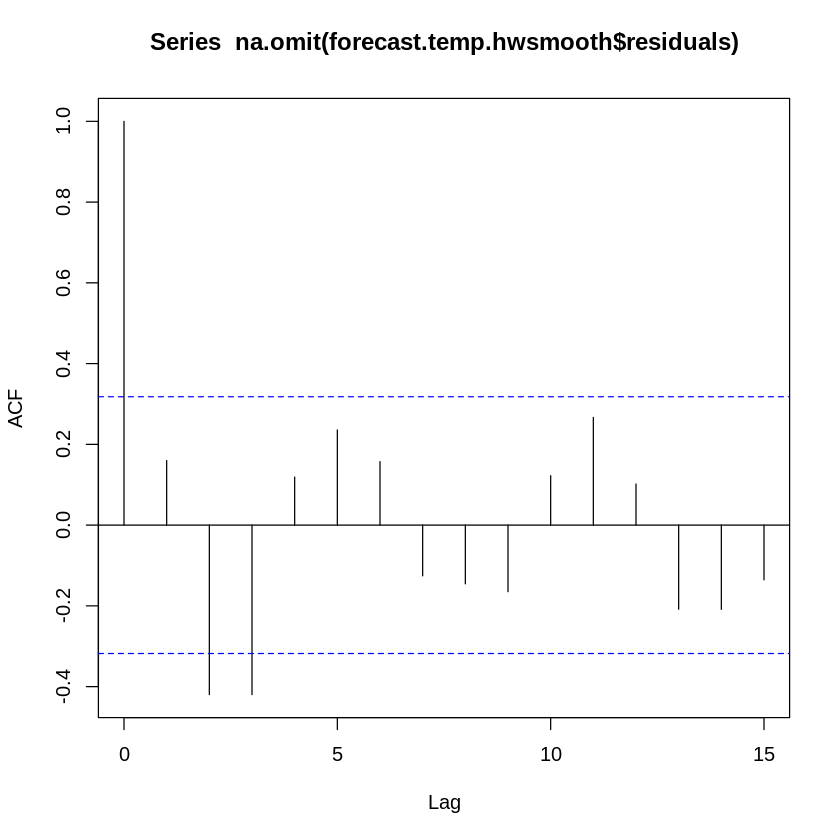

In [ ]:
acf(na.omit(forecast.temp.hwsmooth$residuals)) #Residuals of Holts smoothing

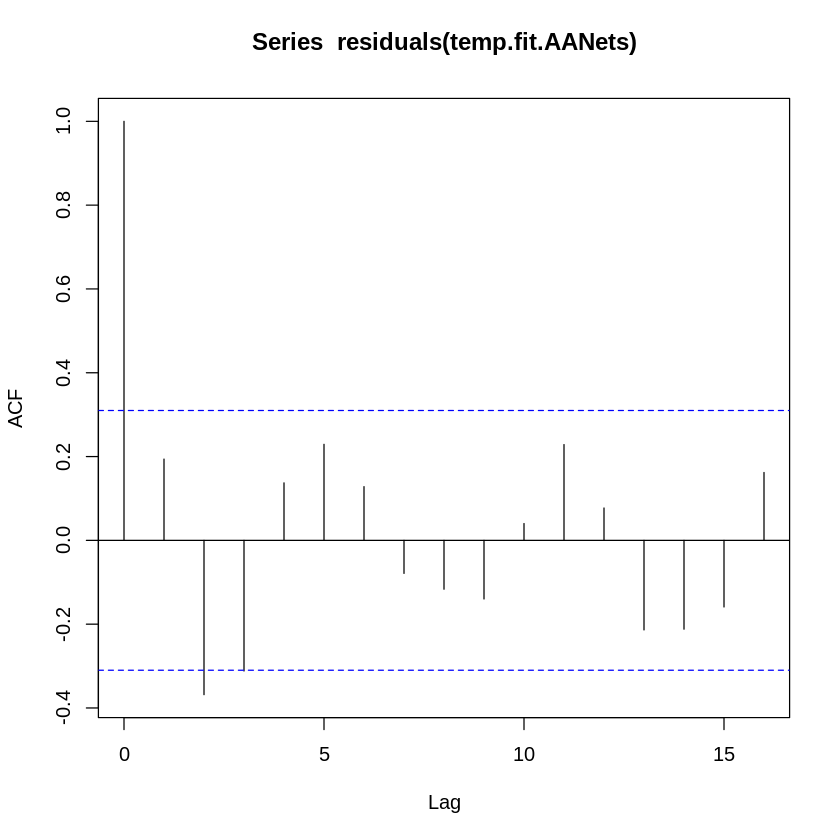

In [ ]:
acf(residuals(temp.fit.AANets))

In [ ]:
Box.test(residuals(temp.fit.AANets), type="Ljung-Box")


	Box-Ljung test

data:  residuals(temp.fit.AANets)
X-squared = 1.6199, df = 1, p-value = 0.2031


In [ ]:
accuracy(temp.fit.AANets)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-87.18295,1496.711,1164.218,-0.07847664,1.903635,0.6244603,0.1939213


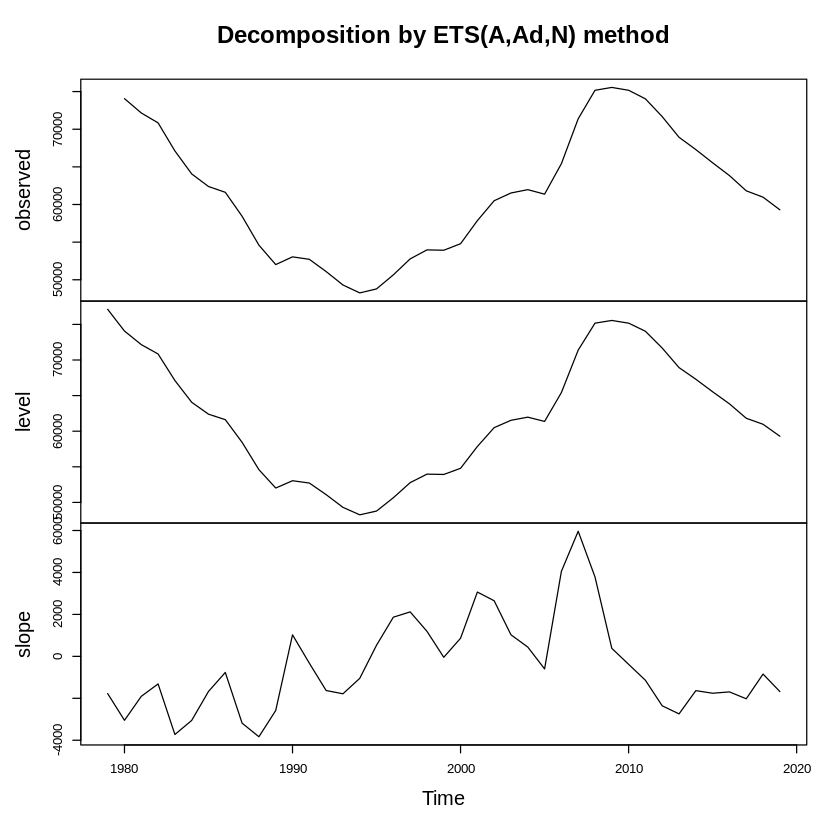

In [ ]:
plot(temp.fit.AANets)

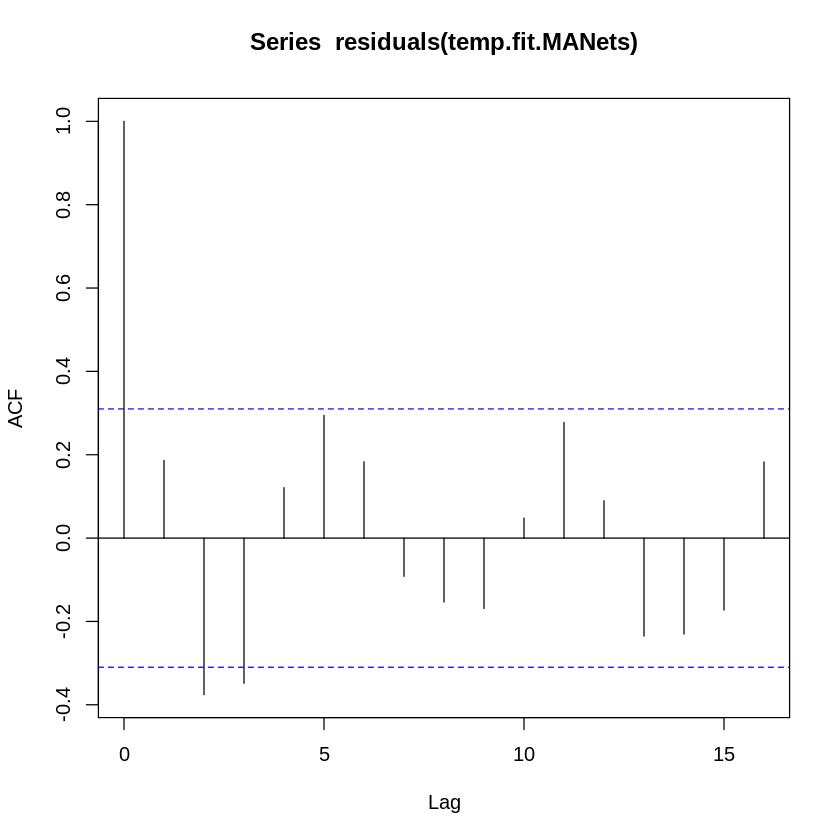

In [ ]:
acf(residuals(temp.fit.MANets)) #Residuals of ETS(MAN) - holt’s with multiplicative errors

In [ ]:
Box.test(residuals(temp.fit.MANets)) #test alternative hypothesis and check if the autocorrelation for the errors get bigger


	Box-Pierce test

data:  residuals(temp.fit.MANets)
X-squared = 1.3851, df = 1, p-value = 0.2392


In [ ]:
accuracy(temp.fit.MANets) #check accuracy of test

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-91.46534,1501.622,1168.513,-0.0842584,1.909434,0.6267639,0.1916428


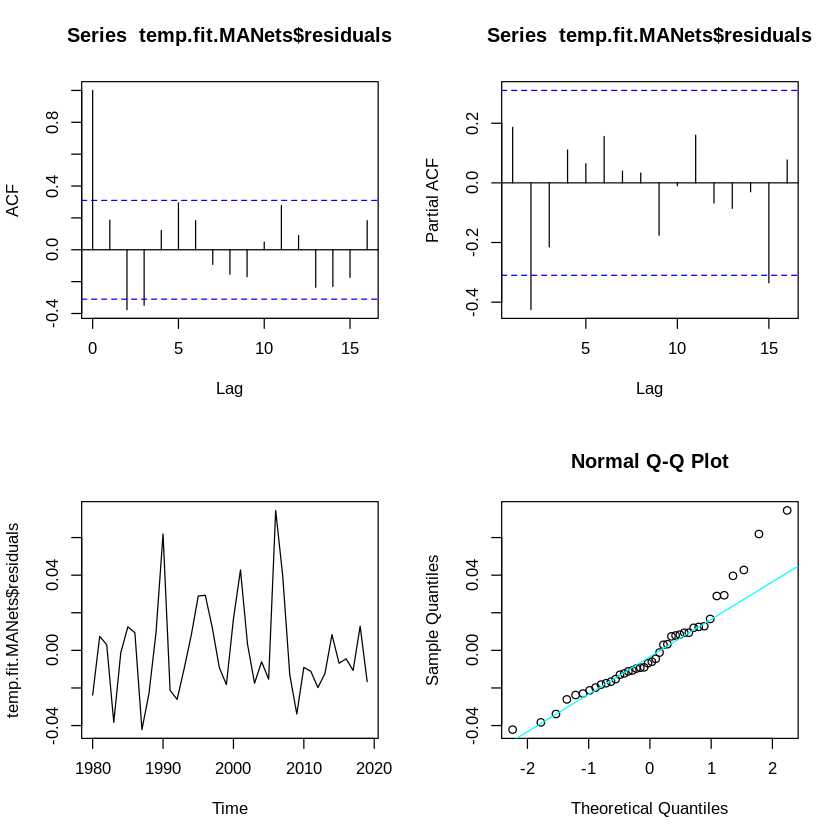

In [ ]:
par(mfrow=c(2,2))
acf(temp.fit.MANets$residuals)
pacf(temp.fit.MANets$residuals)
plot(temp.fit.MANets$residuals)
qqnorm(temp.fit.MANets$residuals)
qqline(temp.fit.MANets$residuals, col="cyan")

From the Ljung Box test we see that there is no autocorrelation in the residuals.

## ARIMA
ARIMA is an acronym for “autoregressive integrated moving average.” It's a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a time series model. ARIMA models will only work if the data is stationarised using differencing methods or other transfromations and you have substansial data to work with.

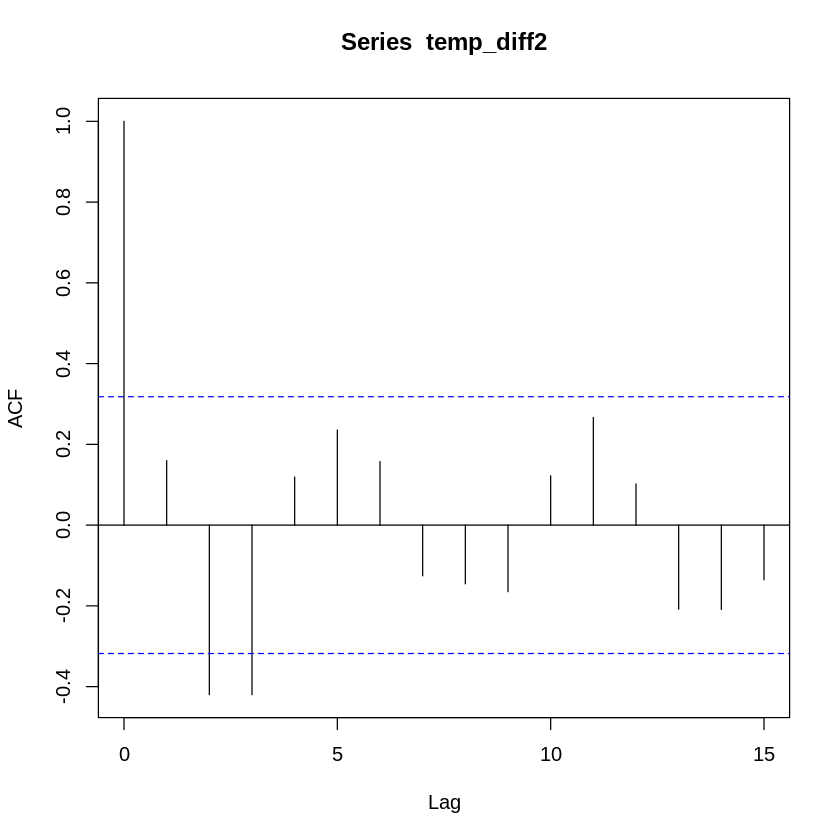

In [ ]:
acf(temp_diff2) #used to compute the estimate of the autocorrelation function 

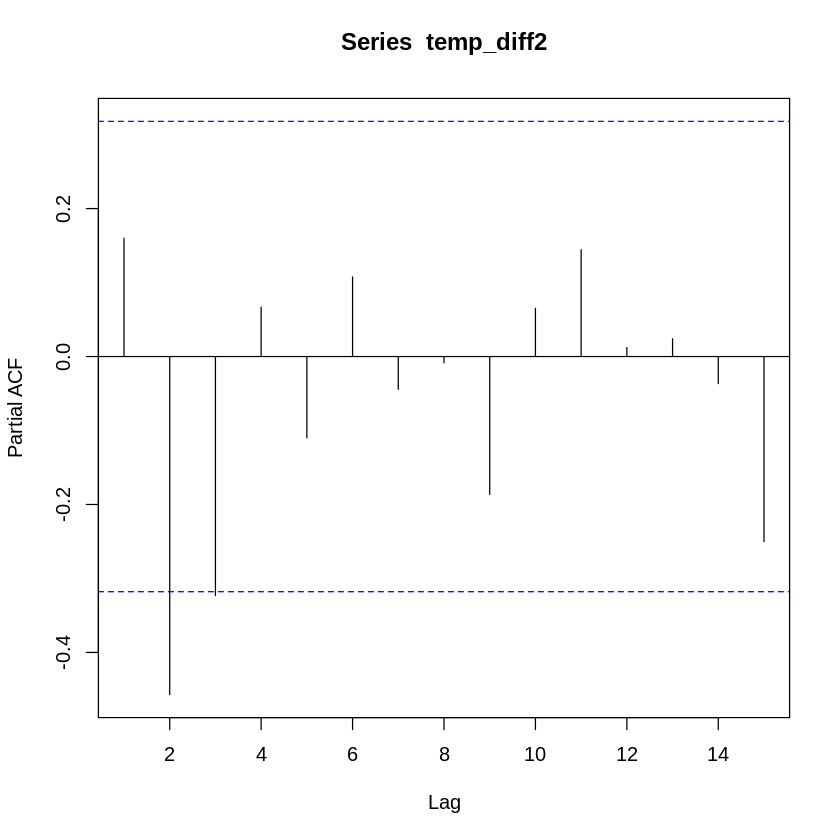

In [ ]:
pacf(temp_diff2) #used to compute the estimate of the partial autocorrelation function 

In [ ]:
auto.arima(temp)

Series: temp 
ARIMA(3,1,0) 

Coefficients:
         ar1      ar2     ar3
      1.1075  -0.6595  0.3402
s.e.  0.1542   0.2145  0.1587

sigma^2 = 1934945:  log likelihood = -336.77
AIC=681.54   AICc=682.71   BIC=688.19

In [ ]:
kpss.test(temp_diff3)

Warning message in kpss.test(temp_diff3):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  temp_diff3
KPSS Level = 0.061756, Truncation lag parameter = 3, p-value = 0.1


In [ ]:
pp.test(temp_diff3)

Warning message in pp.test(temp_diff3):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  temp_diff3
Dickey-Fuller Z(alpha) = -29.957, Truncation lag parameter = 3, p-value
= 0.01
alternative hypothesis: stationary


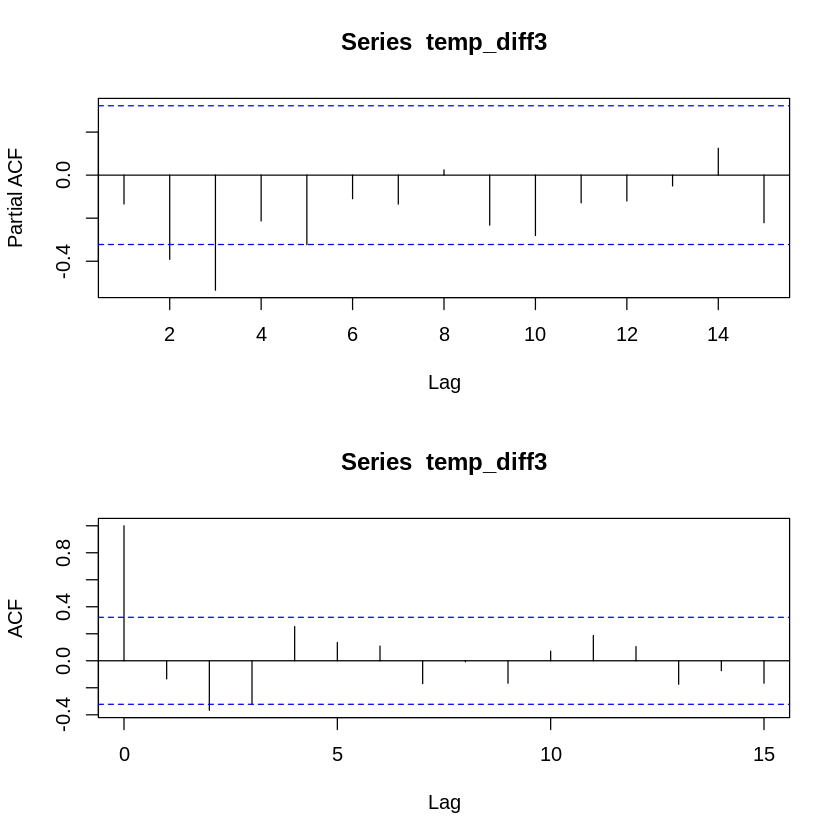

In [ ]:
par(mfrow=c(2,1))
pacf(temp_diff3)
acf(temp_diff3)

In [ ]:
temp.fit.arima3_1_0 <- auto.arima(temp)
temp.fit.arima3_2_0 <- arima(temp, order=c(3,2,0))
temp.fit.arima0_3_1 <- arima(temp, order=c(0,3,1))

In [ ]:
summary(temp.fit.arima3_1_0)

Series: temp 
ARIMA(3,1,0) 

Coefficients:
         ar1      ar2     ar3
      1.1075  -0.6595  0.3402
s.e.  0.1542   0.2145  0.1587

sigma^2 = 1934945:  log likelihood = -336.77
AIC=681.54   AICc=682.71   BIC=688.19

Training set error measures:
                    ME    RMSE      MAE        MPE    MAPE     MASE        ACF1
Training set -99.95824 1319.64 933.0241 -0.1062991 1.52883 0.500453 -0.08898832

 AUTO ARIMA SUGGESTION - Auto ARIMA suggests the 3rd difference, the 3rd differnce stationarises the data the best without losing too much of the data. 
The ar levels also seems to decrease after its first level.

In [ ]:
accuracy(temp.fit.arima3_1_0)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-99.95824,1319.64,933.0241,-0.1062991,1.52883,0.500453,-0.08898832


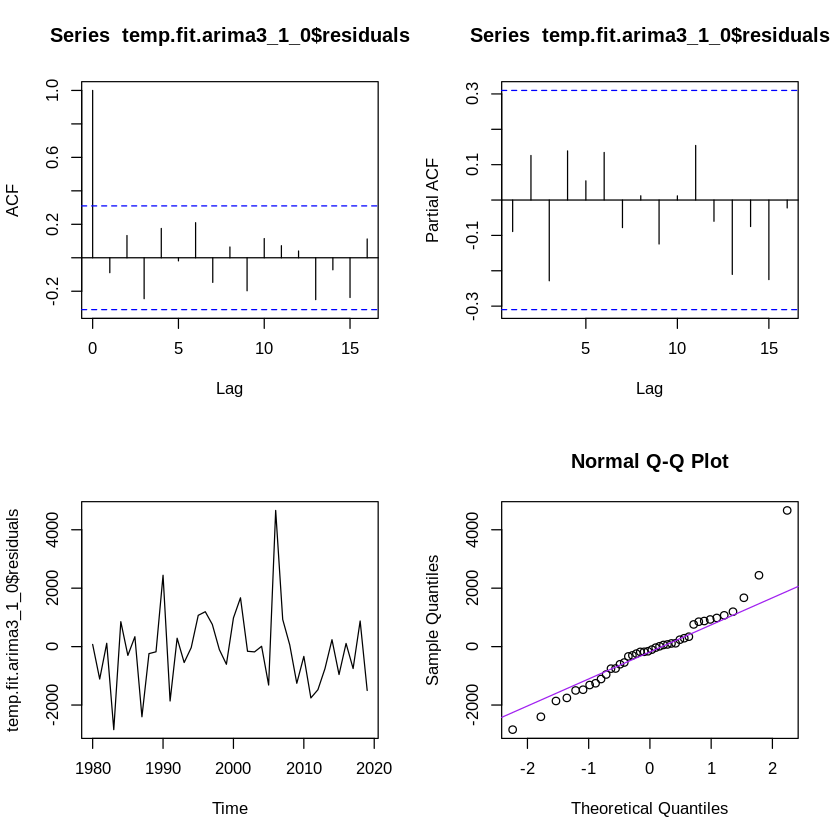

In [ ]:
par(mfrow=c(2, 2))
acf(temp.fit.arima3_1_0$residuals)
pacf(temp.fit.arima3_1_0$residuals)    #Residual Analysis for ARIMA 310
plot(temp.fit.arima3_1_0$residuals)
qqnorm(temp.fit.arima3_1_0$residuals)
qqline(temp.fit.arima3_1_0$residuals, col="purple")

In [ ]:
summary(temp.fit.arima3_2_0)


Call:
arima(x = temp, order = c(3, 2, 0))

Coefficients:
         ar1      ar2      ar3
      0.0948  -0.3851  -0.3004
s.e.  0.1584   0.1458   0.1598

sigma^2 estimated as 1766081:  log likelihood = -327.61,  aic = 663.21

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set 15.46899 1295.404 988.8239 0.1180372 1.61176 0.5303828 0.0208938

In [ ]:
accuracy(temp.fit.arima3_2_0)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,15.46899,1295.404,988.8239,0.1180372,1.61176,0.5303828,0.0208938


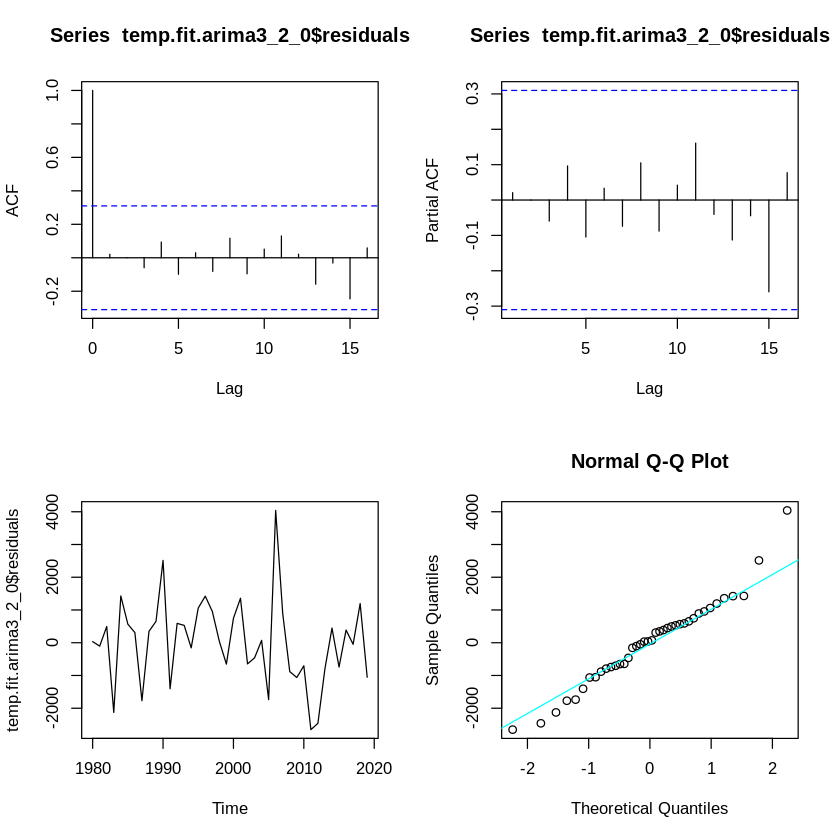

In [ ]:
par(mfrow=c(2, 2))
acf(temp.fit.arima3_2_0$residuals)  #Residual Analysis for ARIMA 320
pacf(temp.fit.arima3_2_0$residuals)
plot(temp.fit.arima3_2_0$residuals)
qqnorm(temp.fit.arima3_2_0$residuals)
qqline(temp.fit.arima3_2_0$residuals, col="cyan")

In [ ]:
summary(temp.fit.arima0_3_1)


Call:
arima(x = temp, order = c(0, 3, 1))

Coefficients:
          ma1
      -1.0000
s.e.   0.0844

sigma^2 estimated as 2670018:  log likelihood = -328.07,  aic = 660.15

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE     MASE
Training set -57.13435 1571.701 1216.127 -0.01938608 1.999085 0.652303
                  ACF1
Training set 0.1729237

In [ ]:
accuracy(temp.fit.arima0_3_1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-57.13435,1571.701,1216.127,-0.01938608,1.999085,0.652303,0.1729237


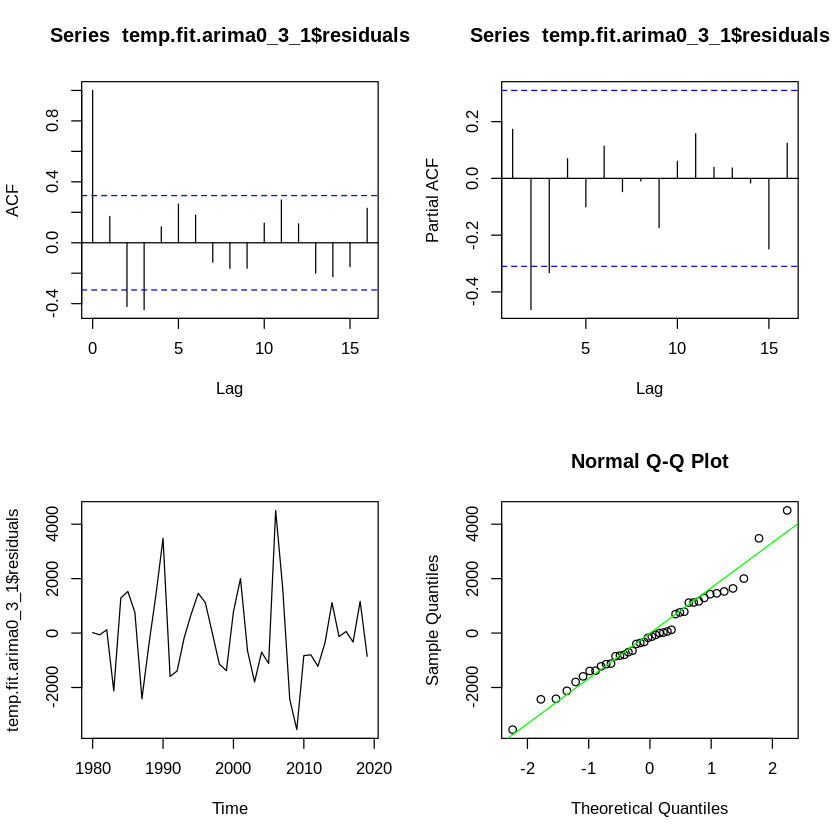

In [ ]:
par(mfrow=c(2,2))
acf(temp.fit.arima0_3_1$residuals)   #Residual Analysis for ARIMA 031
pacf(temp.fit.arima0_3_1$residuals)
plot(temp.fit.arima0_3_1$residuals)
qqnorm(temp.fit.arima0_3_1$residuals)
qqline(temp.fit.arima0_3_1$residuals, col="green")

In [ ]:
temp.fit.arima0_2_2 <- arima(temp, order=c(0,2,2)) #holt

In [ ]:
summary(temp.fit.arima0_2_2)


Call:
arima(x = temp, order = c(0, 2, 2))

Coefficients:
          ma1      ma2
      -0.0463  -0.3812
s.e.   0.1498   0.1320

sigma^2 estimated as 2170049:  log likelihood = -331.29,  aic = 668.59

Training set error measures:
                 ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set 12.642 1435.912 1096.914 0.1165206 1.79201 0.5883596 0.1124847

In [ ]:
accuracy(temp.fit.arima0_2_2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,12.642,1435.912,1096.914,0.1165206,1.79201,0.5883596,0.1124847


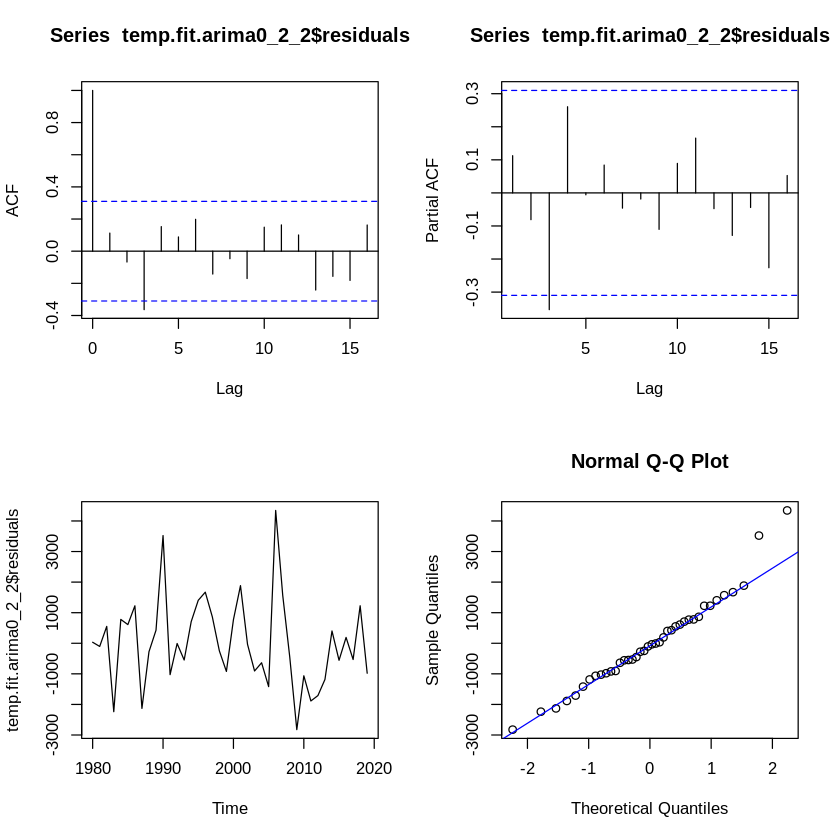

In [ ]:
par(mfrow=c(2,2)) 
acf(temp.fit.arima0_2_2$residuals)  #Residual Analysis for ARIMA 022
pacf(temp.fit.arima0_2_2$residuals)
plot(temp.fit.arima0_2_2$residuals)
qqnorm(temp.fit.arima0_2_2$residuals)
qqline(temp.fit.arima0_2_2$residuals, col="blue")

In [ ]:
temp.fit.arima0_1_4 <- arima(temp, order=c(0,1,4))

In [ ]:
summary(temp.fit.arima0_1_4)


Call:
arima(x = temp, order = c(0, 1, 4))

Coefficients:
         ma1     ma2    ma3     ma4
      1.1304  0.6543  0.153  0.1075
s.e.  0.1697  0.2500  0.206  0.1683

sigma^2 estimated as 1803174:  log likelihood = -336.99,  aic = 683.97

Training set error measures:
                    ME     RMSE    MAE        MPE     MAPE      MASE
Training set -136.2659 1325.983 907.71 -0.1881702 1.502168 0.4868751
                    ACF1
Training set -0.01346912

In [ ]:
accuracy(temp.fit.arima0_1_4)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-136.2659,1325.983,907.71,-0.1881702,1.502168,0.4868751,-0.01346912


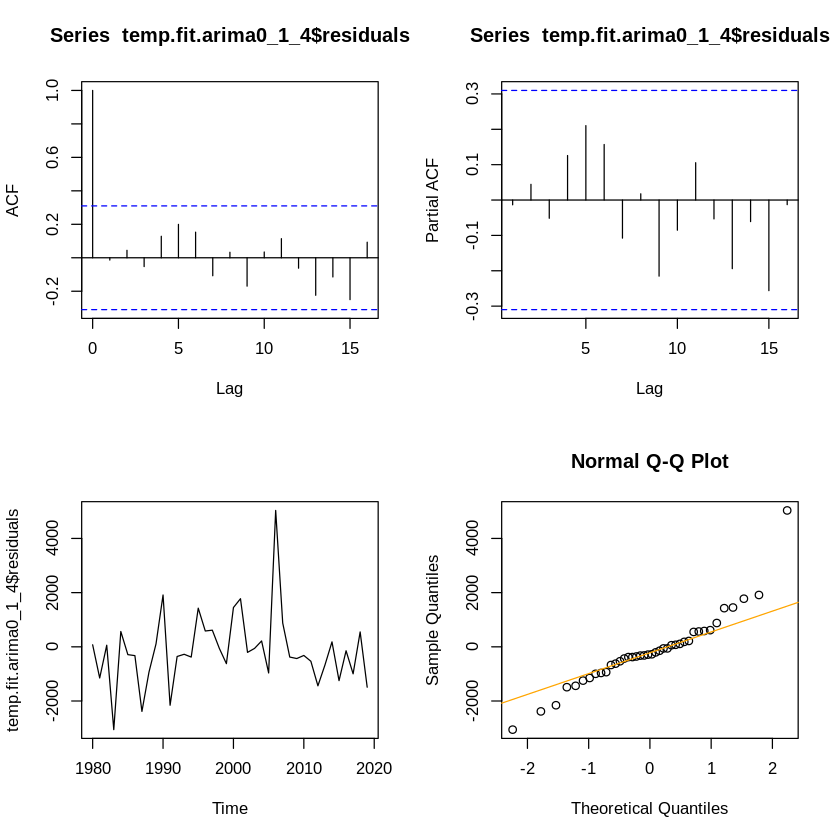

In [ ]:
par(mfrow=c(2,2))
acf(temp.fit.arima0_1_4$residuals)    #Residual Analysis for ARIMA 014
pacf(temp.fit.arima0_1_4$residuals)   #Checking if this is a better fit
plot(temp.fit.arima0_1_4$residuals)
qqnorm(temp.fit.arima0_1_4$residuals)
qqline(temp.fit.arima0_1_4$residuals, col="orange")

# Model Evaluation and Forecasting

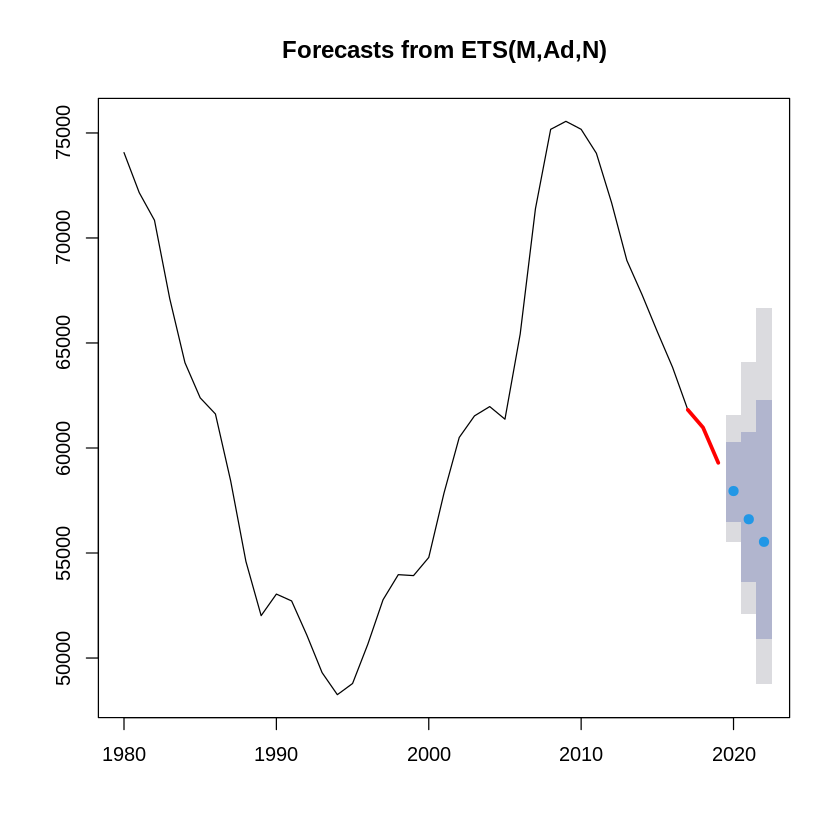

In [ ]:
forecast.fit.MANets <- forecast(temp.fit.MANets, h=3, bootstrap = TRUE)
plot(forecast.fit.MANets)
lines(temp.holdout, col="red", lwd=3)

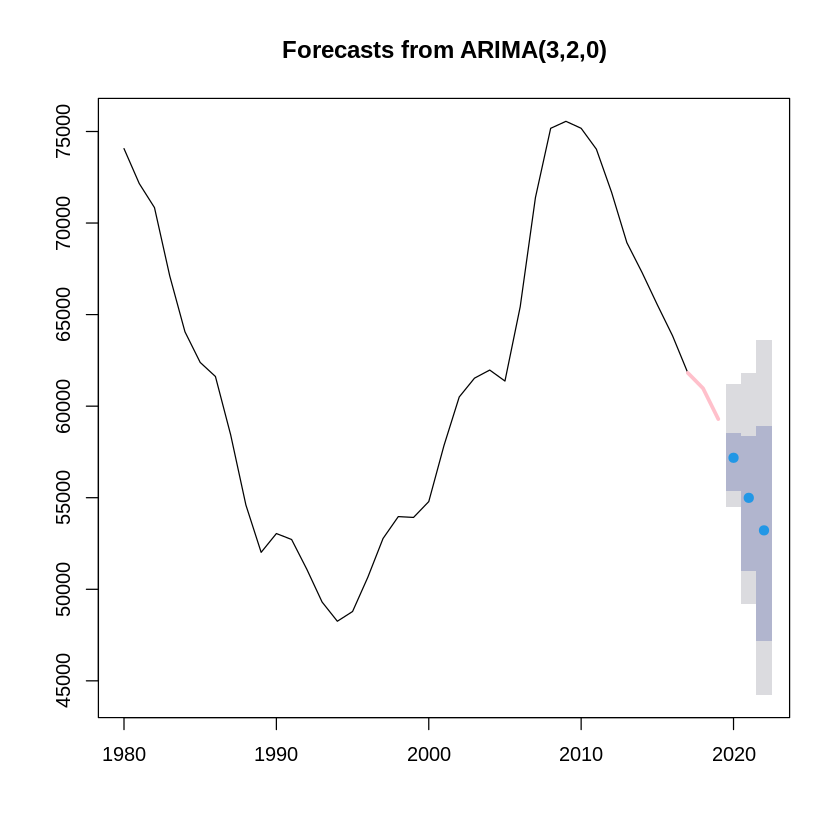

In [ ]:
forecast.fit.arima3_2_0 <- forecast(temp.fit.arima3_2_0, h=3, bootstrap = TRUE)
plot(forecast.fit.arima3_2_0)
lines(temp.holdout, col="pink", lwd=3)

In [ ]:
temp.holdout

A Time Series:
[1] 61818 60973 59294

In [ ]:
forecast.fit.MANets

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020       57951.04 56452.91 60262.54 55521.14 61551.77
2021       56607.98 53613.46 60781.43 52117.30 64097.17
2022       55533.54 50914.34 62274.80 48783.00 66673.51

In [ ]:
forecast.fit.arima3_2_0

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020       57180.78 55393.83 58523.70 54511.04 61205.14
2021       54993.73 50982.05 58381.93 49177.33 61831.27
2022       53217.43 47172.54 58891.59 44245.26 63596.50

# Conclusions

My conclusions of 'Live Births in Ireland in 1980-2019' is a non-stationary set of data which saw steady growth until 2008 where it peaked and has been on a down trend since then. After using some forecasting methods from my ARIMA (3,2,0) model which I think fits the data the best and my ETS model both suggest that the the number of births in Ireland will continue to fall from 2020 to 2022. 
External factors such as the Recession in 2008 caused birth rates to deterioate in years to follow due to a crumbling economy and families struggling to afford food and shelter for their children led to down trend after 2008. The Irish economy has since recovered extremely well and with a exponentailly growing population you would think birth rates would grow in line with this but it hasn't and my forecast suggest it will get worse.
More research would be required to identify possible culture changes or more complex demographic changes that has led to a decrease in birth rates possible reasons may include less desire for couples to have families, contraception methods are well known and researched for people to use compared to 20+ years ago and women are taking on more important roles in society compared to the 1980s so they avoid having babies which will keep them out of work.